# Aprendizado de Máquina e Análise Estatística

[Scikit Learn](http://scikit-learn.org) é um sistema avançado de algoritmos de aprendizado de máquinas.

A idéia é gerar um conjunto de algoritmos que possa ser usado de forma genérica como uma ferramenta de predição.


## Aprendizado Não Supervisionado


Nesse primeiro exemplo usamos o [K-Means](http://scikit-learn.org/stable/modules/clustering.html#k-means) para procurar por 3 clusters em um conjunto com 4 aglomerados. 

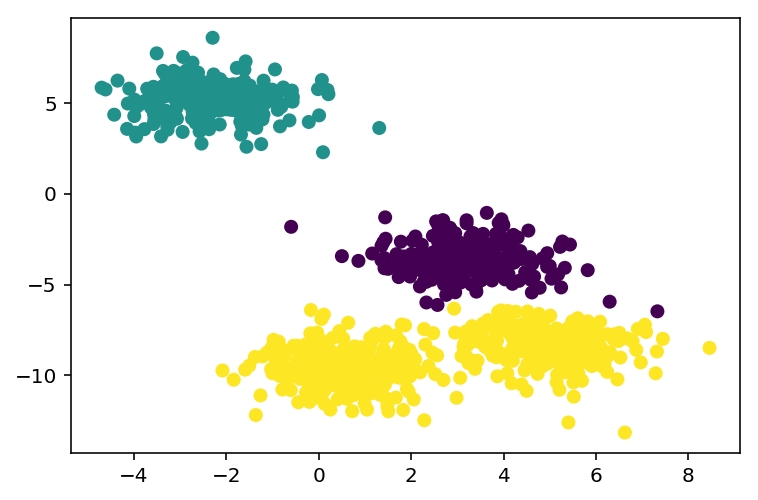

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers = 4)
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [26]:
y_pred


array([2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0,
       0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2,

### Exemplo dos Carros

In [27]:
def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

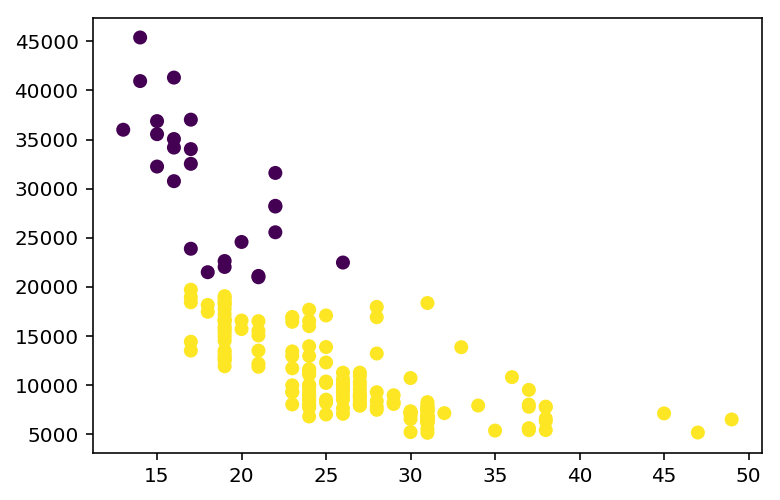

In [29]:
X = auto_prices[['city-mpg','price']]
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X['city-mpg'], X['price'], c=y_pred)



In [48]:
a = np.array([1, 2])
a.tolist()



[1, 2]

In [58]:
temp,=np.where(y_pred==0)
case0=set(case0.tolist())




In [53]:
case0






array([  8,  11,  12,  13,  14,  15,  16,  44,  45,  46,  60,  61,  62,
        63,  64,  65,  66,  67, 118, 119, 120, 121, 192, 193, 194])

## Exercício 

Refaça o exercício acima trocando preço por potência. Compare os grupos obtidos pelas abordagens. São os mesmos? 

### Ajuste de Modelos

[Statsmodels](http://www.statsmodels.org) é uma biblioteca de modelagem estatística. 

Esse exemplo ajusta um modelo de mínimos quadrados ao modelo`'B ~ A + np.log(A) + 1'` .




In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = pd.DataFrame(
    {
        'A': [1, 2, 3, 5, 6, 8, 8.5, 10, 9, 10, 11, 10, 11, 12, 15],
        'B': [4, 4, 3, 3, 4, 3,   2,  2, 2,  1,  2,  1,  1, .5, .1]
    })
model = smf.ols('B ~ A + np.log(A) + 1', data=data)
results = model.fit()
print(results.params)
print()
print(results.summary())

Intercept    4.268332
A           -0.413538
np.log(A)    0.660203
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     29.00
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           2.54e-05
Time:                        17:30:05   Log-Likelihood:                -11.395
No. Observations:                  15   AIC:                             28.79
Df Residuals:                      12   BIC:                             30.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

/ext/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [7]:
X.columns=["A", "B"]

In [8]:
model = smf.ols('np.log(B) ~  np.log(A)  + 1', data=X)
results = model.fit()
print(results.params)
print()
print(results.summary())

Intercept    14.745648
np.log(A)    -1.684867
dtype: float64

                            OLS Regression Results                            
Dep. Variable:              np.log(B)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     425.8
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           1.03e-50
Time:                        14:53:50   Log-Likelihood:                -30.906
No. Observations:                 195   AIC:                             65.81
Df Residuals:                     193   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

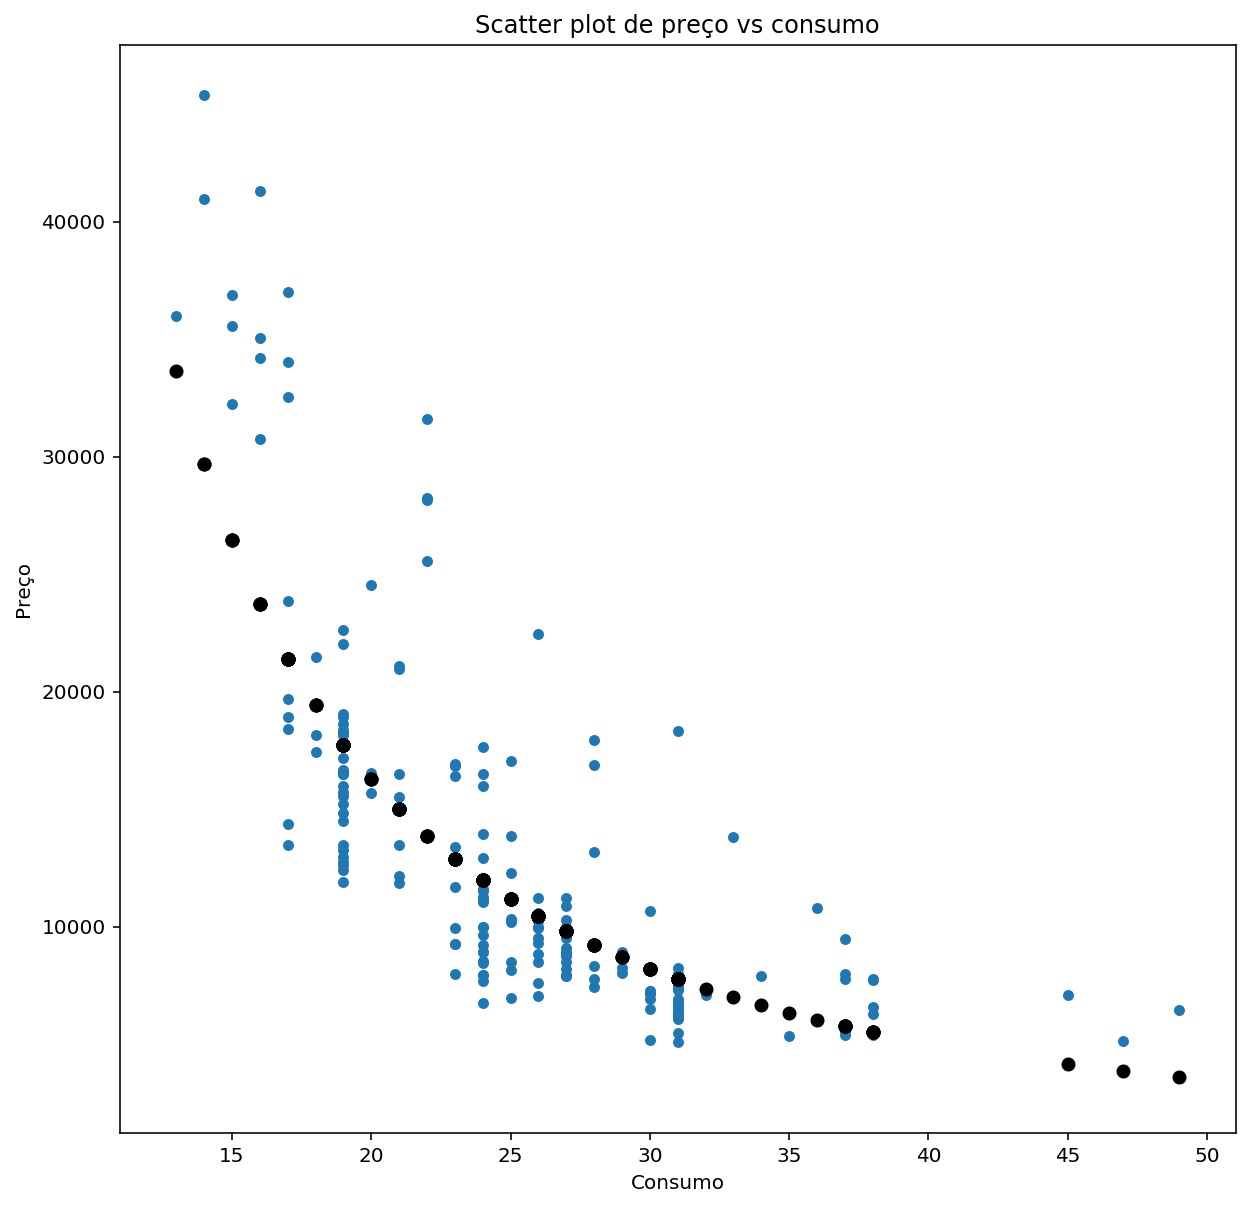

In [9]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot de preço vs consumo') # Give the plot a main title
ax.set_xlabel('Consumo') # Set text for the x axis
ax.set_ylabel('Preço')# Set text for y axis
plt.scatter(X["A"],np.exp(results.fittedvalues),color="black")

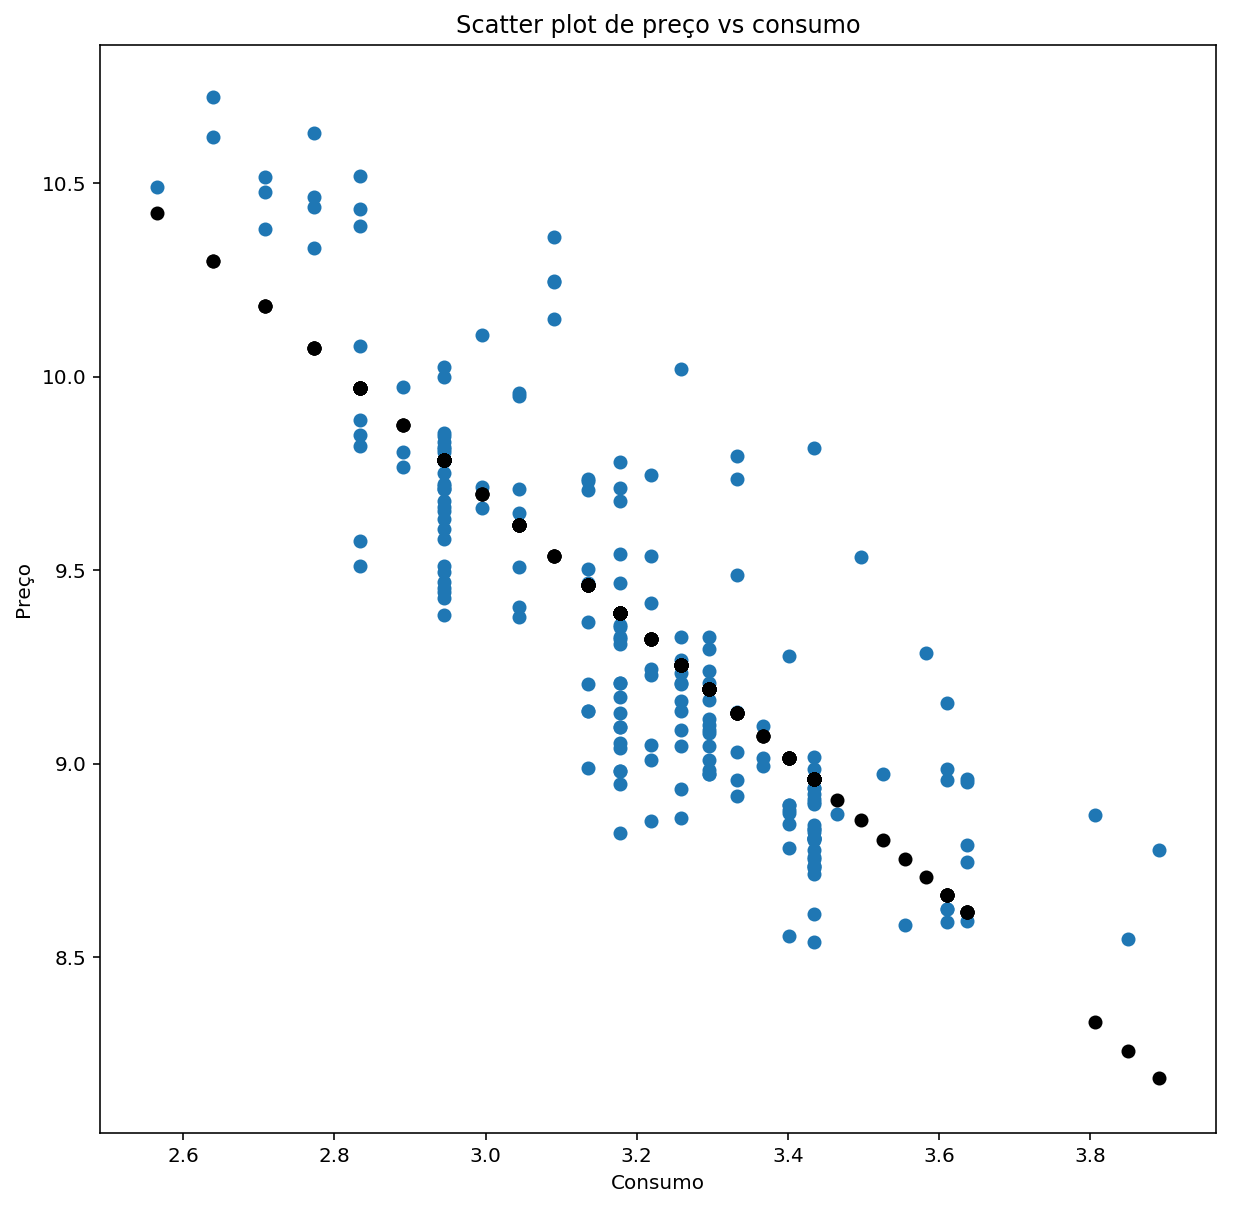

In [10]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis   
plt.scatter(np.log(X["A"]),np.log(X["B"]))
ax.set_title('Scatter plot de preço vs consumo') # Give the plot a main title
ax.set_xlabel('Consumo') # Set text for the x axis
ax.set_ylabel('Preço')# Set text for y axis
plt.scatter(np.log(X["A"]),results.fittedvalues,color="black")

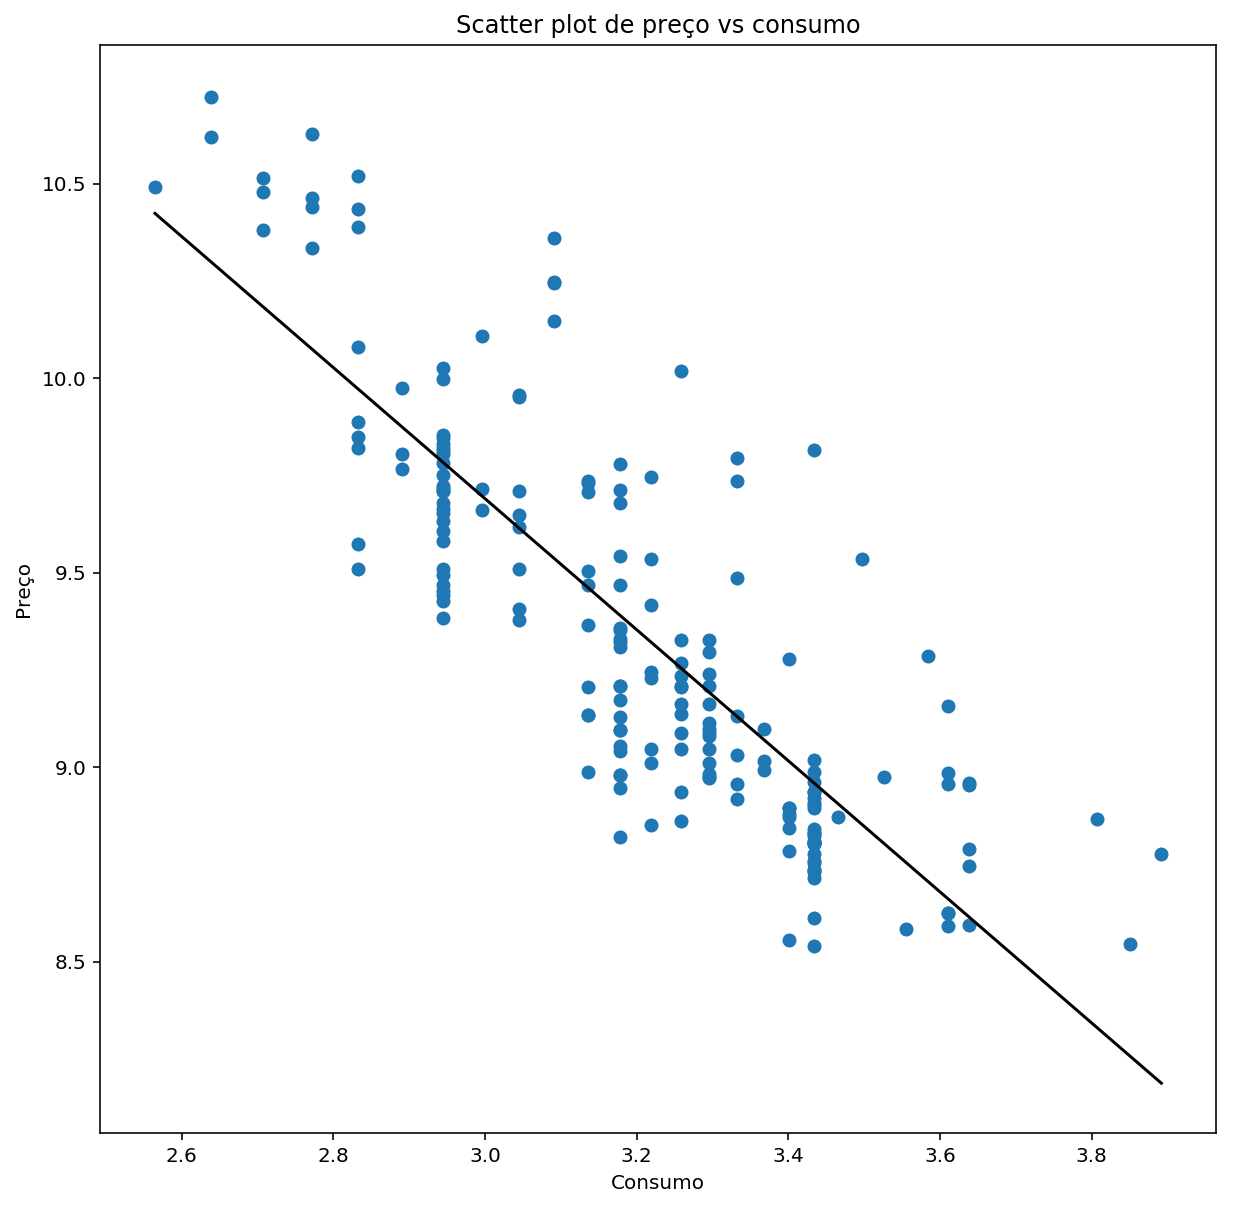

In [11]:
xmin=np.log(X["A"].min())
xmax=np.log(X["A"].max())
x1=np.linspace(xmin,xmax)
y1=x1*results.params[1]+results.params[0]

fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis   
plt.scatter(np.log(X["A"]),np.log(X["B"]))
ax.set_title('Scatter plot de preço vs consumo') # Give the plot a main title
ax.set_xlabel('Consumo') # Set text for the x axis
ax.set_ylabel('Preço')# Set text for y axis
plt.plot(x1,y1,color="black")


### Exercícios

- Estime quão mais econômicos são os carros na estrada do que  na cidade. 

## Testes Estatísticos

Text(0,0.5,'Engine size')

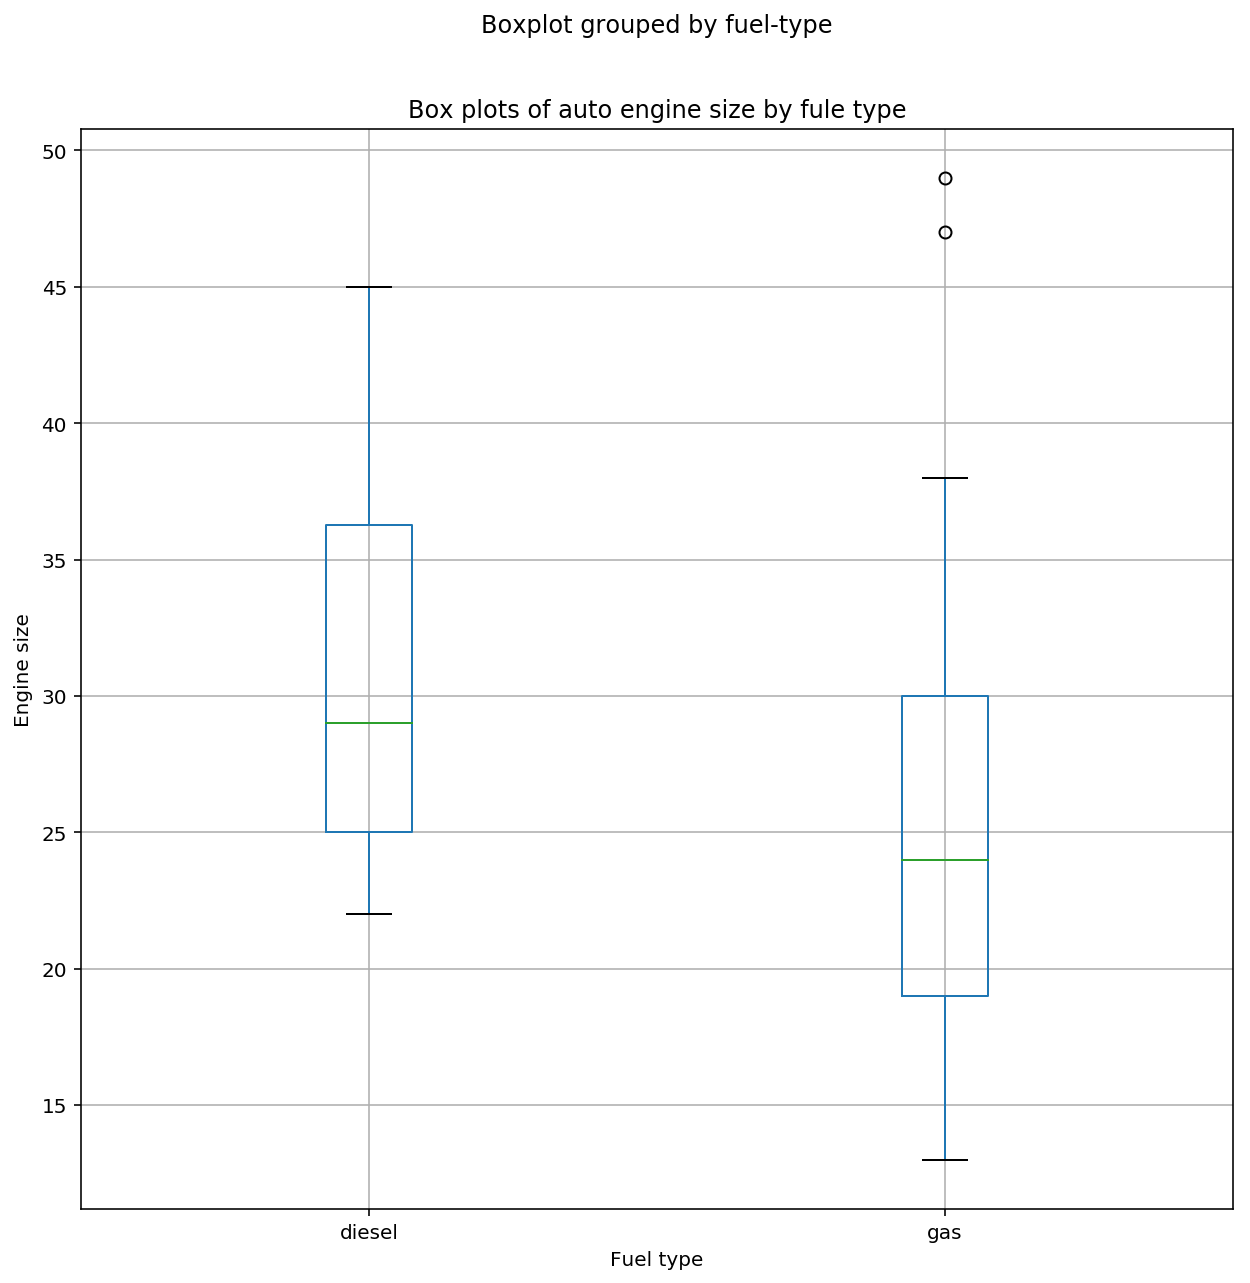

In [34]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices[['city-mpg','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

In [12]:
gp=auto_prices.groupby('fuel-type')

In [13]:
df_diesel=gp.get_group('diesel')
df_gas=gp.get_group('gas')

In [15]:
from scipy.stats import ttest_ind
data1, data2 = df_gas['city-mpg'],df_diesel['city-mpg']
stat, p = ttest_ind(data1, data2)


In [32]:
gp['city-mpg'].mean()

fuel-type
diesel    30.300000
gas       24.811429
Name: city-mpg, dtype: float64

O teste verifica se as médias são diferentes ou se são estatísticamente equivalentes. Isso é verificado pelo p_value, que é a probabilidade da hipótese nula ser verdadeira. Nesse caso p_value é menor que 0.05. Ou seja o consumo é maior nos carros a diesel, ao menos no que concerne ao volume de combustível usado. 

In [17]:
p

0.00023110438286911008

Podemos fazer a mesma análise usando o módulo statsmodels

In [35]:
import statsmodels as sm

In [36]:
sm.stats.weightstats.ttest_ind(data1,data2)

(-3.7529740719677207, 0.00023110438286911008, 193.0)

## Exercício

Verifique se os carros a diesel são mais potentes que os carros a gasolina. Verifique se eles são mais caros também. 